In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 01. array oriented programming

數據分析最重要的概念, 大概是「不到最後關頭, 絕不輕言使用迴圈」。我們先來迴圈版處理以下的問題, 班上同學成績太可怕, 老師決定要調分。

In [2]:
grades = [56, 62, 71, 45, 70]

(這時現場同學建議開根號乘以 10。)

我們用 Python 做, 標準程序是這樣。

In [3]:
new_grades = []

for g in grades:
    new_g = np.sqrt(g)*10
    print(f"調整後成績: {new_g:.2f}")
    new_grades.append(new_g)

調整後成績: 74.83
調整後成績: 78.74
調整後成績: 84.26
調整後成績: 67.08
調整後成績: 83.67


成績還有再提高的空間, 於是就每位同學再加 15 分!

In [4]:
new_grades = []

for g in grades:
    new_g = np.sqrt(g)*10 + 15
    print(f"調整後成績: {new_g:.2f}")
    new_grades.append(new_g)

調整後成績: 89.83
調整後成績: 93.74
調整後成績: 99.26
調整後成績: 82.08
調整後成績: 98.67


當然, `new_grades` 就是最新的成績。

In [5]:
new_grades

[89.83314773547883,
 93.74007874011811,
 99.2614977317636,
 82.0820393249937,
 98.66600265340756]

### 換成 np.array 來做

把 `list` 換成 `array`, 就在 list 前加入 `np.array` 就可以了!

In [5]:
arr_grades = np.array(grades)

In [6]:
arr_grades

array([56, 62, 71, 45, 70])

這有什麼好處呢? 比如說開根號乘以 10...

In [7]:
np.sqrt(arr_grades)*10

array([74.83314774, 78.74007874, 84.26149773, 67.08203932, 83.66600265])

這太炫了吧! 那我們之前迴圈是做什麼的!? 最好的是, 看到結果, 可以很方便的修正。比如我們最後要「開根號乘以 10」之後, 每位同學再加 15 分!

In [8]:
np.sqrt(arr_grades)*10 + 15

array([89.83314774, 93.74007874, 99.26149773, 82.08203932, 98.66600265])

真的就算完了! 要紀錄下來可以指定一個新的 `array`。

In [9]:
arr_new_grades = np.sqrt(arr_grades)*10 + 15

In [10]:
arr_new_grades

array([89.83314774, 93.74007874, 99.26149773, 82.08203932, 98.66600265])

好事不只這樣, 還可以算平均...

In [11]:
arr_new_grades.mean()

92.71655323715235

甚至標準差...

In [15]:
arr_new_grades.std()

6.33540471768489

### brocasting

我們做的很多動作, 專有名詞叫 broadcasting。

In [16]:
np.array([3, 4, 5, 9, 12]) + 5

array([ 8,  9, 10, 14, 17])

我們另外再想一個狀況, 就是有同學期中考、期末考、平時成績分別是 89, 99, 60。老師說期中佔 30%, 期末 40%, 平時 30%。我們可以幫同學算算學期成績嗎?

In [12]:
mygrades = np.array([89, 99, 60])

In [13]:
weights = np.array([0.3, 0.4, 0.3])

可否把分數分別乘上各自的權重?

In [14]:
mygrades * weights

array([26.7, 39.6, 18. ])

In [15]:
g = mygrades * weights

再加總起來!

In [21]:
g.sum()

84.3

### dot product

這真的可以! 但再仔細想想, 剛剛不就是在算一般內積, 也就是 dot product 嗎? `numpy` 是否有指令? 答案當然是肯定的。

In [16]:
np.dot(mygrades, weights)

84.3

但是新時代的 `numpy` 喜歡用 `@` 這個二元運算代替。

In [18]:
mygrades @ weights

84.3

## 02. 不同 shape 轉換

資料型態可能是純量 (0 階 array), 向量 (1 階 array), 矩陣 (2 階 array)... 當然可以更高階!

#### 0 階 array (0 階 tensor)

In [19]:
egg = 94.87

#### 1 階 array (1 階 tensor)

In [20]:
egg = np.array([9, 4, 8, 7])

#### 2 階 array (2 階 tensor)

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])

In [22]:
A

array([[1, 2, 3],
       [4, 5, 6]])

這樣有點難打的話, 我們可以用 `reshape`。

In [23]:
B = np.array([3, 9, 6, 12, 8, 20, 1, 10, 7])

In [24]:
B

array([ 3,  9,  6, 12,  8, 20,  1, 10,  7])

In [25]:
A.shape

(2, 3)

In [26]:
B.shape

(9,)

In [27]:
B.reshape(3,3)

array([[ 3,  9,  6],
       [12,  8, 20],
       [ 1, 10,  7]])

不錯耶, 看看 B 是否改好了...

In [28]:
B

array([ 3,  9,  6, 12,  8, 20,  1, 10,  7])

並沒有。於是再一次 reshape, 這次重新存入 B。

In [29]:
B = B.reshape(3,3)

In [30]:
B

array([[ 3,  9,  6],
       [12,  8, 20],
       [ 1, 10,  7]])

### 矩陣乘法

其實, 就是我們熟悉的...

In [31]:
A @ B

array([[ 30,  55,  67],
       [ 78, 136, 166]])

### 取出某一列、某一行、某個元素

In [32]:
C = A @ B

In [33]:
C

array([[ 30,  55,  67],
       [ 78, 136, 166]])

In [34]:
C[1]

array([ 78, 136, 166])

In [35]:
C[1,1]

136

In [36]:
C[:,2]

array([ 67, 166])

### 拉平

把一個矩陣拉平也是常做的事...

In [37]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
A.ravel()

array([1, 2, 3, 4, 5, 6])

In [39]:
A

array([[1, 2, 3],
       [4, 5, 6]])

### 小練習

數據分析我們一筆一筆輸入的資料本來長這樣:

In [40]:
X = np.array([3, 9, 1, 3, -5, 1, 2])

要變成這樣:

    [[3], [9], [1], ...]

In [41]:
X.reshape(7,1)

array([[ 3],
       [ 9],
       [ 1],
       [ 3],
       [-5],
       [ 1],
       [ 2]])

等等, 我們要自己知道多少個元素嗎? 其實 Python 可以算。

In [42]:
len(X)

7

In [43]:
X.reshape(len(X), 1)

array([[ 3],
       [ 9],
       [ 1],
       [ 3],
       [-5],
       [ 1],
       [ 2]])

## 03. array 的 filter 功能

又有一些同學的成績來了, 這次我們要找出及格同學的成績。

In [44]:
grades = np.array([59, 30, 25, 65, 60, 100, 85, 8])

於是我們開始「工人智慧」, 建一個 `array`, 一個個檢查, 及格就標 `True`, 不及格就是 `False`。

In [45]:
passed = np.array([False, False, False, True, True, True, True, False])

然後我們表現神奇的篩選法!

In [46]:
grades[passed]

array([ 65,  60, 100,  85])

這就是說, 我們可以把 `grades` 中, 被 `passed` 標註 `True` 的篩出來!

當然, 我們自己做這件事太笨了一點, 也許可以叫 Python 做?

In [47]:
passed = (grades >= 60)

In [48]:
passed

array([False, False, False,  True,  True,  True,  True, False])

真的可以! 於是代入 `grades` 中。

In [49]:
grades[passed]

array([ 65,  60, 100,  85])

其實更炫的是可以直接下條件...

In [50]:
grades[grades>=60]

array([ 65,  60, 100,  85])

甚至可以多項條件用 `&`...

In [51]:
(grades>=60) & (grades<80)

array([False, False, False,  True,  True, False, False, False])

In [52]:
grades[(grades>=60) & (grades<80)]

array([65, 60])

或是用 `|` 代表 `or`。

In [53]:
grades[(grades<60) | (grades>=80)]

array([ 59,  30,  25, 100,  85,   8])

### filter 在畫圖的應用

複習一下, 要畫個 $\sin$。

In [54]:
π = np.pi

In [55]:
x = np.linspace(-2*π, 2*π, 1000)

In [56]:
y = np.sin(x)

In [57]:
len(x) == len(y)

True

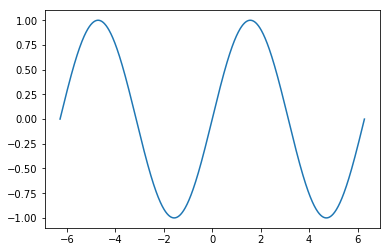

In [58]:
plt.plot(x, y)

我們要標出 y 值大於 0 的部份...

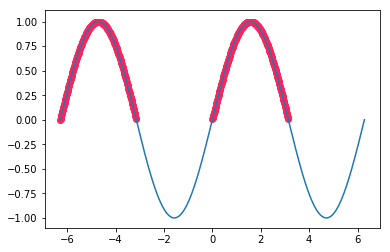

In [59]:
plt.scatter(x[y>0], y[y>0], c='#FF235A')
plt.plot(x, y)

有同學發現, 這個點好像是畫在線的下方! 有可能改嗎? 那容易, 就是把點畫在高一點的層, 線畫在低一點的就好。要控制輸出層是用 `zorder`。

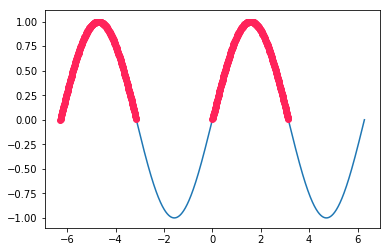

In [64]:
plt.scatter(x[y>0], y[y>0], c='#FF235A', zorder=1)
plt.plot(x, y, zorder=0)

## 04. 模擬數據集

現在我們來模擬一組數據。

In [65]:
x = np.linspace(0, 1.3, 50)
y = np.sin(x)

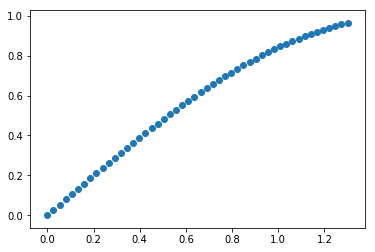

In [66]:
plt.scatter(x, y)

但真實世界好像沒有這麼美的數據集。原來我們一般認為, 真實世界有個完美的函數, 但實際看到是加上雜訊 (noise) 的結果:

$$f(x) + \varepsilon$$

In [67]:
noise = 0.1*np.random.randn(50)

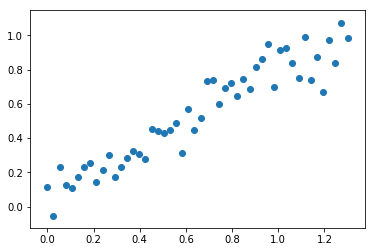

In [68]:
plt.scatter(x, y + noise)

是不是看來真實多了嗎?

### 分類模擬

現在我們隨機生成一堆數字, 然後隨機分成四類!

In [69]:
P = np.random.randn(50, 2)

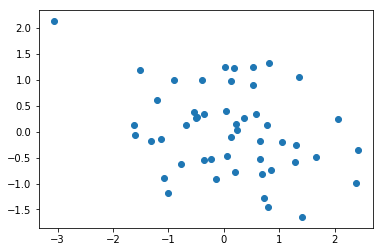

In [70]:
plt.scatter(P[:,0], P[:,1])

每個點都隨機分為 1, 2, 3, 4 其中一組。

In [71]:
cl = np.random.randint(1, 5, 50)

畫圖很神奇只要指定:
    
    c = cl
    
就會把不同組畫不同色!

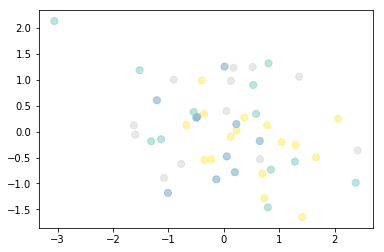

In [72]:
plt.scatter(P[:,0], P[:,1], c=cl, s=50,
           alpha=0.6, cmap="Set3")

## 05. SymPy

符號型的運算, 就是一般「數學課本會出現的運算」。

In [74]:
1/2 + 1/3

0.8333333333333333

可不可以得到 $$\dfrac{5}{6}$$ 呢? 那就要 `sympy` 幫忙...

In [75]:
import sympy as sp

In [76]:
1/2 + 1/3

0.8333333333333333

還是不是啊? 原來要定義一個有理數, 要用:
    
    sp.Rational(p,q)
    
這樣就定義了一個 $$\dfrac{p}{q}$$。

In [77]:
sp.Rational(1,2) + sp.Rational(1,3)

5/6

真的是 $\frac{5}{6}$! 但這有點醜, 我們先來解決...

In [78]:
sp.init_printing()

In [79]:
sp.Rational(1,2) + sp.Rational(1,3)

### `sympify` SymPy 化!

我們可以把 1 令為要給 sympy 處理的數字, 於是會有...

In [80]:
sp.sympify(1)/2

沒有 `sympify` 的下場還是一様!

In [81]:
1/2

之前的 $$\dfrac{1}{2} + \dfrac{1}{3}\mbox{。}$$

In [98]:
sp.sympify(1)/2 + sp.sympify(1)/3

但 `sympify` 有點長, 其實這可以用 `S` 取代!

In [83]:
sp.S(1)/2 + sp.S(1)/3

甚至覺得好用, 把 S 當一個標準指令。

In [85]:
from sympy import S

In [86]:
S(1)/2 + S(1)/3

不只這樣, SymPy 寫不完成的, 會和我們人寫的方式一様!

In [87]:
sp.sqrt(3)

In [88]:
sp.pi

### 指定變數

In [105]:
x = sp.symbols('x')

In [106]:
x

In [107]:
x**2

In [109]:
x = sp.symbols(r'\xi')

In [111]:
x

In [112]:
from sympy.abc import x

In [113]:
x

In [114]:
f = x**2 - 3*x + 5

In [115]:
f

In [116]:
sp.diff(f)

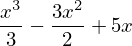

In [117]:
sp.integrate(f)

In [118]:
f.subs(x, 2)

In [119]:
from sympy.abc import y

In [120]:
g = 3*x*y + 2*x - 5*y**2

In [121]:
g

In [123]:
sp.diff(g, x)

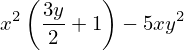

In [124]:
sp.integrate(g, x)

### 微分

In [126]:
sp.diff(sp.log(x), x)

In [127]:
sp.diff(sp.sin(x))

In [128]:
sp.diff(sp.cos(x))

### 積分

In [129]:
sp.integrate(sp.log(x))

In [131]:
sp.integrate(sp.log(x), (x, 1, 5))

### 極限

In [132]:
sp.limit(sp.sin(x)/x, x, 0)

### 矩陣

In [134]:
A = sp.Matrix([[1, 2, 3], [4, 5, 7],[7, 8, 9]])

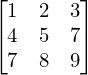

In [135]:
A

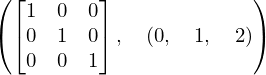

In [137]:
A.rref()

In [138]:
A.det()

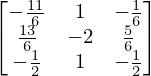

In [139]:
A.inv()

In [140]:
f

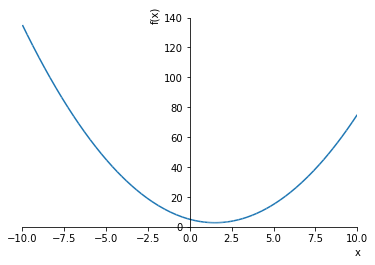

In [142]:
sp.plot(f)

In [143]:
g = -x**2

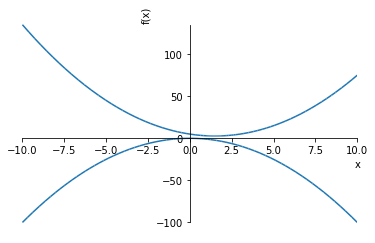

In [144]:
sp.plot(f, g)

In [145]:
a = 7

In [147]:
sp.isprime(a)

True

In [148]:
sp.isprime(9487)

False

In [149]:
sp.prime(1)

In [150]:
sp.prime(2)

In [151]:
sp.prime(3)

In [152]:
sp.prime(4)

In [153]:
sp.prime(9487)

In [154]:
sp.isprime(98849)

True

In [155]:
a = sp.prime(2)
b = sp.prime(2 + 1)

if b-a == 2:
    print((a,b), "是孿生質數")

(3, 5) 是孿生質數


In [157]:
sp.prime(32139238900)

In [158]:
sp.pi

In [162]:
(sp.pi).n(10000)

In [163]:
π = sp.pi

In [164]:
π.n(100)

In [167]:
magic = str(π.n(100000))

In [168]:
'1215' in magic

True